## Housing Project - Phase 2


### Import Housing Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas
import geopy
from bs4 import BeautifulSoup
import requests
import re
import sklearn
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
data = pd.read_csv('data/kc_house_data.csv')

### Take a look at the data summaries

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.mean()

id               4.580474e+09
price            5.402966e+05
bedrooms         3.373200e+00
bathrooms        2.115826e+00
sqft_living      2.080322e+03
sqft_lot         1.509941e+04
floors           1.494096e+00
waterfront       7.595859e-03
view             2.338627e-01
condition        3.409825e+00
grade            7.657915e+00
sqft_above       1.788597e+03
yr_built         1.971000e+03
yr_renovated     8.363678e+01
zipcode          9.807795e+04
lat              4.756009e+01
long            -1.222140e+02
sqft_living15    1.986620e+03
sqft_lot15       1.275828e+04
dtype: float64

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#Look at number of unique values in a column to determine categorical data
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

### Remove Unnecessary Data

In [66]:
#drop columns that we don't need
drop = ['date','yr_built', 'yr_renovated', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

data2 = data.drop(columns = drop, axis=1)

In [67]:
data2.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
view             63
condition         0
grade             0
zipcode           0
lat               0
long              0
dtype: int64

In [68]:
#drop null values in waterfront and view columns considering they
#shouldn't impact our analysis
data2.dropna()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,98053,47.6561,-122.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,98116,47.5773,-122.409
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,98103,47.6993,-122.346
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,98146,47.5107,-122.362
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,98144,47.5944,-122.299


### Differentiate categorical and numerical data, look at relationship between variables

In [69]:
#preliminary identification of cat/ num variables  
cat_var = ['waterfront', 'view', 'condition', 'grade', 
            'zipcode', 'lat','long']
num_var = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

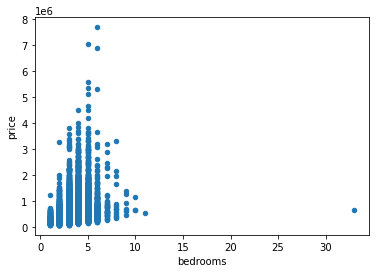

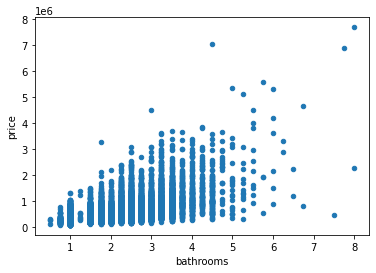

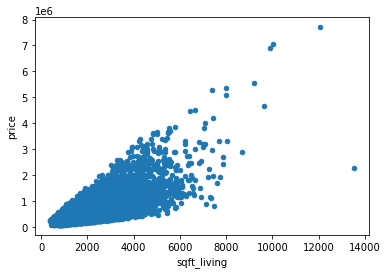

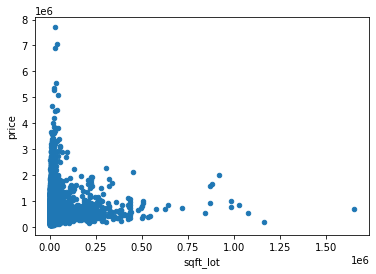

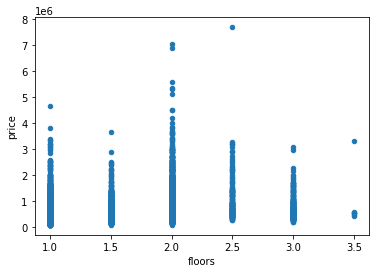

In [70]:
for column in num_var: 
    data2.plot.scatter(x=column, y='price')

In [12]:
data2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045


In [13]:
#create separate categorical and numerical df's
num_data = data2.drop(columns = cat_var)
cat_data = data2.drop(columns = num_var)

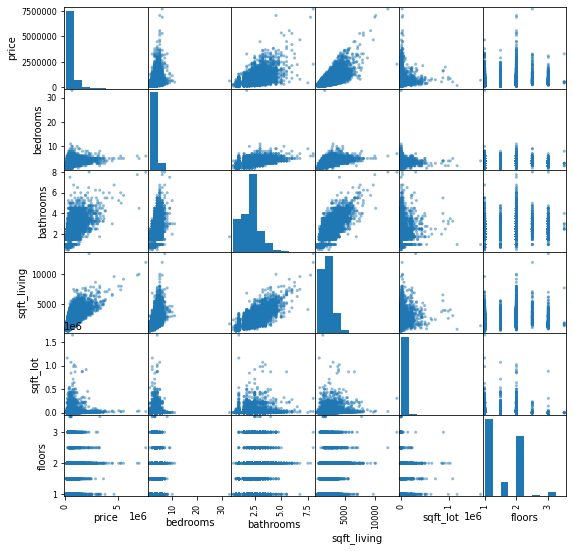

In [14]:
pd.plotting.scatter_matrix(num_data,figsize  = [9, 9]);

In [15]:
#compare variables to check for multicollinearity 
abs(data2.corr()) > 0.7

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long
price,True,False,False,True,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,False,False,False


### Web scrape additional data

#### Dog Park locations

In [16]:
url_park = 'http://www.seattle.gov/parks/find/dog-off-leash-areas'
html_park = requests.get(url_park)
soup_park = BeautifulSoup(html_park.content, 'html.parser')

In [17]:
dog_parks = soup_park.findAll('div', class_='OffLeashLocation')

In [18]:
dog_park_address = []
for tag in dog_parks:
    dog_park_address.append(tag.text.strip())

In [19]:
dog_park_df = pd.DataFrame(dog_park_address)
dog_park_df.dropna(inplace=True)

#### Public Transport locations

In [20]:
url_transit = 'https://www.soundtransit.org/ride-with-us/stations/link-light-rail-stations'
html_transit = requests.get(url_transit)
soup_transit = BeautifulSoup(html_transit.content, 'html.parser')

In [21]:
link = soup_transit.find_all('a', href=True)
links = []
for l in link:
    links.append(l.get('href'))

transit_links = []
for links in links[54:70]:
    transit_links.append('https://www.soundtransit.org' + links)

In [22]:
container = []
partial = []
first = []
last = []
transit_addresses = []

for link in transit_links:
    r = requests.get(link)
    html_content = r.text
    soup = BeautifulSoup(html_content, 'html.parser')

    container = soup.findAll('div', class_='block--location__card-address')
    
    for tag in container: 
        partial.append(tag.text.strip())

In [23]:
for i, add in enumerate(partial):
    if i % 2 == 0:
        first.append(add)
for i, add in enumerate(partial):
    if i % 2 != 0:
        last.append(add)
    transit_addresses = list(zip(first, last))

In [24]:
transit_df = pd.DataFrame(transit_addresses)

In [25]:
#save addresses to DF
transit_df.to_csv('TransitAddresses.csv')

#### Full park list King County

In [26]:
url_parks = 'https://www.kingcounty.gov/services/parks-recreation/parks/parks-and-natural-lands/parksatoz.aspx'
html_parks = requests.get(url_parks)
soup_parks = BeautifulSoup(html_parks.content, 'html.parser')

In [27]:
addresses = soup_parks.findAll('strong')

In [28]:
park_addresses = []
for item in addresses:
    park_addresses.append(item.text.strip())
    
unwanted = ['Access','Use','Useful Links','Acreage:','Usage:','','Accessibility:',
            'Length:','Use:','Access:','Useful links','.','Trail length:','Helpful links']
park_addresses = [x for x in park_addresses if x not in unwanted]

In [29]:
names = soup_parks.findAll('a', class_ = 'collapsed')

In [30]:
park_names = []
for item in names: 
    park_names.append(item.text.strip())

In [31]:
park_names.pop(0)
park_names.pop(27)
park_names.pop(7)
park_names.pop(41)
park_names.pop(62)
park_names.pop(-39)

'Rattlesnake Mountain Scenic Area'

In [32]:
print(len(park_names))
print(len(park_addresses))

158
158


In [33]:
parks = dict(zip(park_names, park_addresses))

In [34]:
#remove = ['Natural Area', 'Trail Site','Open Space', 'Forest', 'Trailhead', 'Aquatic Center']

#dict((k,v) for k,v in parks.items() if not 'Natural Area' in k)
#dict((k,v) for k,v in parks.items() if not 'Trail Site' in k)
#dict((k,v) for k,v in parks.items() if not 'Open Space' in k)
#dict((k,v) for k,v in parks.items() if not 'Forest' in k)
#dict((k,v) for k,v in parks.items() if not 'Trailhead' in k)
#dict((k,v) for k,v in parks.items() if not 'Aquatic Center' in k)

In [35]:
len(parks)

158

In [36]:
parks_df = pd.DataFrame.from_dict(parks, orient = 'index')

In [37]:
#save addresses to DF
parks_df.to_csv('data/ParkAddresses_Revised.csv')

### Import Address .csv's to find distances from housing data

In [38]:
king_parks = pd.read_csv('data/ParkAddresses_Revised_wLatLong.csv',index_col='ID')
king_transit = pd.read_csv('TransitAddresses_wLatLong.csv',index_col='ID')

In [39]:
king_parks.dropna(inplace=True)

In [40]:
#create function to find distances between all points in DF and return matrix
def find_distance(dataframe):
    dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
    
    #convert lat and long to radians
    dataframe[['lat_radians','long_radians']] = (np.radians(dataframe.loc[:,['Lat','Long']]))
    
    #create list matrix (results in miles)          
    dist_matrix = (dist.pairwise
    (data2[['lat_radians_A','long_radians_A']],
     dataframe[['lat_radians','long_radians']])*3959)
                                                 
    #return a matrix DataFrame
    return pd.DataFrame(dist_matrix)                                             

In [41]:
#convert lat and long to radians in housing data
data2[['lat_radians_A','long_radians_A']] = (np.radians(data2.loc[:,['lat','long']]))

#### Use function to create distance matrix for Transit Stations & find min distance

In [42]:
transit_matrix = find_distance(king_transit)

In [43]:
#find min distance in each row
transit_min_matrix = transit_matrix.where(transit_matrix.values == transit_matrix.min(
    axis=1)[:,None]).drop_duplicates()

<ipython-input-43-8e3fc398147e>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  transit_min_matrix = transit_matrix.where(transit_matrix.values == transit_matrix.min(


In [44]:
#create a new column with only min distance and remove the rest 
transit_min_matrix['min_dist_transit'] = transit_min_matrix[transit_min_matrix.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
nearest_transit = transit_min_matrix['min_dist_transit']

#### Use function to create distance matrix for Park Locations & find min distance

In [45]:
park_matrix = find_distance(king_parks)

In [46]:
#find min distance in each row
park_min_matrix = park_matrix.where(park_matrix.values == park_matrix.min(
    axis=1)[:,None]).drop_duplicates()

<ipython-input-46-0c225c3139a8>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  park_min_matrix = park_matrix.where(park_matrix.values == park_matrix.min(


In [47]:
#create a new column with only min distance and remove the rest 
park_min_matrix['min_dist_park'] = park_min_matrix[park_min_matrix.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
nearest_park = park_min_matrix['min_dist_park']

In [48]:
print('Number of Parks: ' + str(len(nearest_park)))
print('Number of Transit Stations: ' + str(len(nearest_transit)))

Number of Parks: 20818
Number of Transit Stations: 20818


In [49]:
park_min_matrix

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,min_dist_park
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2666235405340103
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.520512817681344
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8314399994448284
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5215566993699836
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3135249790161563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13715812119075999
21590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3084061872031185
21593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10462115301716687
21594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.61116271776766


### Join min distances to housing data

In [50]:
data3 = data2.join(nearest_park)
data4 = data3.join(nearest_transit)

In [51]:
data4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,lat_radians_A,long_radians_A,min_dist_park,min_dist_transit
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,98178,47.5112,-122.257,0.829227,-2.133787,1.2666235405340103,1.2693498614126042
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,98125,47.7210,-122.319,0.832889,-2.134869,3.520512817681344,4.915165168518255
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,98028,47.7379,-122.233,0.833184,-2.133368,0.8314399994448284,6.86305758889424
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,98136,47.5208,-122.393,0.829394,-2.136161,1.5215566993699836,5.187802690823261
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,98074,47.6168,-122.045,0.831070,-2.130087,2.3135249790161563,12.071805961765955


In [52]:
data4['min_dist_park']= data4['min_dist_park'].astype('float64')
data4['min_dist_transit']= data4['min_dist_transit'].astype('float64')

In [65]:
data4[['min_dist_park']].to_csv('data/park_distance.csv')

### Check out the distributions of the new features

C:\Users\danar\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_dist_park', ylabel='Density'>

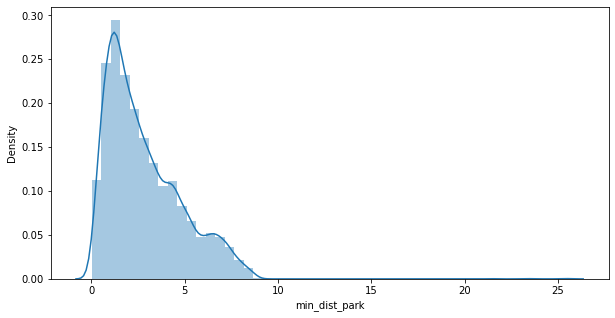

In [54]:
plt.figure(figsize=(10,5))
sns.distplot(data4['min_dist_park'])

C:\Users\danar\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='min_dist_transit', ylabel='Density'>

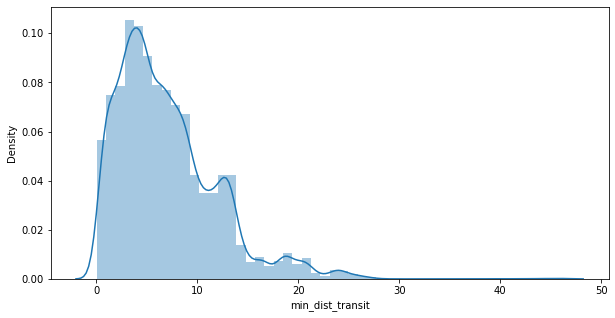

In [55]:
plt.figure(figsize=(10,5))
sns.distplot(data4['min_dist_transit'])

corr. price and transit: -0.08668534050303726
corr. price and parks: 0.24239307937609467


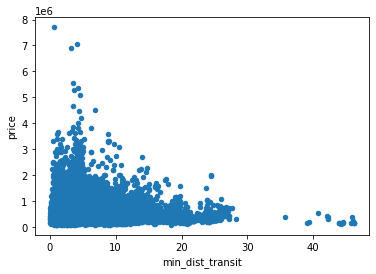

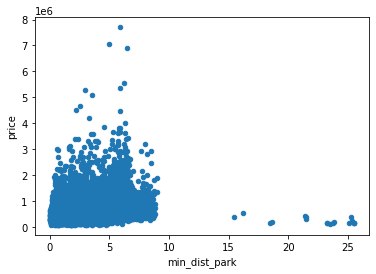

In [56]:
data4.plot.scatter(x='min_dist_transit',y='price');
print('corr. price and transit: ' + str(data4['price'].corr(data4['min_dist_transit'])))
data4.plot.scatter(x='min_dist_park', y='price');
print('corr. price and parks: ' + str(data4['price'].corr(data4['min_dist_park'])))

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
features = num_var
X = data[features]
y = data.price
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### First models

In [59]:
f = 'price ~ sqft_living'
model = ols(formula=f, data=data4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:11:11   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
data4.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long',
       'lat_radians_A', 'long_radians_A', 'min_dist_park', 'min_dist_transit'],
      dtype='object')

In [61]:
f = 'price ~ sqft_living + min_dist_park'
#tried adding sqft_lot and only raised the r value 0.001
model = ols(formula = f, data=data4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:11:11   Log-Likelihood:            -2.8765e+05
No. Observations:               20818   AIC:                         5.753e+05
Df Residuals:                   20815   BIC:                         5.753e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.065e+05   4871.036    -42.398      0.000   -2.16e+05   -1.97e+05
sqft_living     289.0162      1.823    158.579      0.000     285.444     292.588
min_dist_park  5.091e+04    820.373     62.054      0.000    4.93e+04    5.25e+04
==============================================================================
Omnibus:                    14384.261   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           676186.062
Skew:                           2.767   Prob(JB):                         0.00
Kurtosis:                      30.366   Cond. No.                     6.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
f = 'price ~ sqft_living + min_dist_park + waterfront'
#view vs. waterfront - view raised r value .03, waterfront .04
model = ols(formula = f, data = data4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     9904.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:11:11   Log-Likelihood:            -2.5537e+05
No. Observations:               18534   AIC:                         5.107e+05
Df Residuals:                   18530   BIC:                         5.108e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.991e+05   4951.816    -40.208      0.000   -2.09e+05   -1.89e+05
sqft_living     282.6780      1.860    151.969      0.000     279.032     286.324
min_dist_park  5.087e+04    835.975     60.846      0.000    4.92e+04    5.25e+04
waterfront     8.613e+05   1.96e+04     43.870      0.000    8.23e+05       9e+05
==============================================================================
Omnibus:                    11255.674   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           498149.077
Skew:                           2.284   Prob(JB):                         0.00
Kurtosis:                      27.984   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
f = 'price ~ sqft_living + min_dist_park + waterfront + grade + min_dist_transit'
model = ols(formula = f, data = data4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     7276.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:11:11   Log-Likelihood:            -2.5417e+05
No. Observations:               18534   AIC:                         5.084e+05
Df Residuals:                   18528   BIC:                         5.084e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6.121e+05   1.28e+04    -47.878      0.000   -6.37e+05   -5.87e+05
sqft_living        204.3057      2.728     74.904      0.000     198.959     209.652
min_dist_park     4.132e+04    816.207     50.624      0.000    3.97e+04    4.29e+04
waterfront         8.34e+05   1.84e+04     45.276      0.000    7.98e+05     8.7e+05
grade             8.824e+04   2130.321     41.422      0.000    8.41e+04    9.24e+04
min_dist_transit -1.036e+04    338.998    -30.547      0.000    -1.1e+04   -9690.746
==============================================================================
Omnibus:                    13471.613   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           949206.317
Skew:                           2.855   Prob(JB):                         0.00
Kurtosis:                      37.591   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

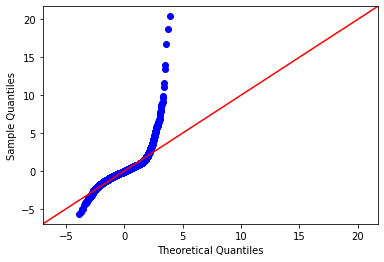

In [64]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)